In [249]:
import numpy as np
import pandas as pd
from itertools import chain, product
import matplotlib.pyplot as plt

Integrantes da dupla:  

Romildo Juliano<br>
Diogo Pedro

### 1

$ M $ é a combinação dos pontos para os pontos de $x, y, z$, portanto $ M = 2N^2 $;  
Podemos interpretar o N atual como o ponto referente à combinação de $x$ com $N$ pontos, $y$ com $N$ pontos e $z$ com $2$ pontos;  
visualmente, temos:

$ N = 1 \Rightarrow (x_0, y_0, z_0) $  
$ N = 2 \Rightarrow (x_0, y_1, z_0) $  
$ \dots $  
$ N = M \Rightarrow (x_N, y_N, z_1) $

Considerando a matriz de impedância $ Z_{m,n} $, onde $ m: 1..M $ e $ n: 1..M $, a matriz de tensão $V_i$ onde $n : 1..M$

$
\renewcommand\arraystretch{2}
\begin{bmatrix}
    Z_{1,1} & Z_{1,2} & \dots & Z_{1,M-1} & Z_{1,M} \\
    Z_{2,1} & Z_{2,2} & \dots & Z_{2,M-1} & Z_{2,M} \\
    \dots   & \dots   & \ddots & \dots & \dots \\
    Z_{M-1,1} & Z_{M-1,2} & \dots & Z_{M-1,M-1} & Z_{M-1,M} \\
    Z_{M,1} & Z_{M,2} & \dots & Z_{M,M-1} & Z_{M,M}
\end{bmatrix}
$
$
\begin{bmatrix}
    a_1     \\
    a_2     \\
    \dots   \\
    a_{M-1} \\
    a_{M}
\end{bmatrix}
$
$=$
$
\renewcommand\arraystretch{2}
\begin{bmatrix}
    V_{1} \\
    V_{2} \\
    \dots \\
    V_{M-1} \\
    V_{M}
\end{bmatrix}
$  

Onde $Z = \begin{cases} Z_{m,n} \approx \dfrac{1}{4\pi\varepsilon_0} \dfrac{\Delta^2}{\sqrt{(x_p - x_i)^2 + (y_p - y_i)^2 + (z_p - z_i)^2}},& m \neq n \\ Z_{m,n} = \dfrac{\Delta}{\pi\varepsilon_0}\ln{(1+\sqrt{2})}, & m = n \end{cases} $  

e a matriz $ V_i, i=1..M $ é constante, com 

$
V = 
\begin{cases}
    V_i = 0, & i \leq \frac{M}{2} = N^2 \\
    V_i = V_0, & i \gt N^2 \\
\end{cases}
$

Pois o V até a metade dos pontos de M é a tensão da placa no $ z=0 $, enquanto que após a metade é a do $ z = d$


### Variáveis e constantes do programa

In [250]:
N = 5

In [251]:
m = 2*(N**2)

L = 10e-2
DELTA = L/N

d = 10e-3
V_0 = 10
e_0 = 8.8541e-12

In [252]:
def plot_placa(x, y):
    plt.plot(x, y, marker='o', markersize=2, color='blue', linestyle='none')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title("Plano XY")
    plt.xlim(-.005, L+.005)
    plt.ylim(-.005, L+.005)
    plt.show()

Uma placa reta, sem espaço vazio em $ x > \dfrac{L}{2} $ e $ y > \dfrac{L}{2}$

Para criar o espaço a partir de $ \dfrac{L}{2} $ em x e y:

In [253]:
def generate_points(N, L):
    x_axis, y_axis = np.meshgrid(
        np.linspace(0, L, N),
        np.linspace(0, L, N)
    )
    
    valid = np.where((x_axis > L/2) & (y_axis > L/2), False, True)
    x_axis_valid = np.where((x_axis > L/2) & (y_axis > L/2), 0, x_axis)
    y_axis_valid = np.where((x_axis > L/2) & (y_axis > L/2), 0, y_axis)
    return (valid, x_axis_valid, y_axis_valid)
    

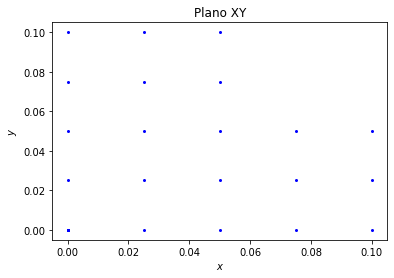

In [254]:
(valid, x_axis_valid, y_axis_valid) = generate_points(N, L)

plot_placa(x_axis_valid, y_axis_valid)

Convertendo os pontos de lista de listas para uma lista só; é como se fosse um zip 

In [255]:
x_flattened = list(chain(*x_axis_valid))
y_flattened = list(chain(*y_axis_valid))
valid_flattened = list(chain(*valid))

In [256]:
def generate_placas(N, x, y, valid, z0, z1):
    placa = pd.DataFrame({
        'x': x,
        'y': y,
        'z': [z0] * (N*N),
        'valid': valid
    })

    placa_d = pd.DataFrame({
        'x': x,
        'y': y,
        'z': [z1] * (N*N),
        'valid': valid
    })
    
    placas = pd.concat([placa, placa_d]).reset_index().drop('index', axis=1)
    return placas

In [257]:
placas = generate_placas(N, x_flattened, y_flattened, valid_flattened, 0, d)
placas.head()

,x,y,z,valid
0,0.000,0.0,0.0,True
1,0.025,0.0,0.0,True
2,0.050,0.0,0.0,True
3,0.075,0.0,0.0,True
4,0.100,0.0,0.0,True


A coluna ```valid``` indica os pontos a serem considerados no cálculo, pois 25% dos pontos do quadrado serão desconsiderados

### Matriz de tensão

Matriz de tensão da placa inferior em 

$ z = 0 $

In [258]:
def generate_V_placas(N, v_placa_1, v_placa_2):
    V_placa = pd.DataFrame(
        data=np.array([v_placa_1] * (N*N)),
        index=range(N*N),
        columns=['V']
    )

    V_placa_d = pd.DataFrame(
        data=np.array([v_placa_2] * (N*N)),
        index=range(N*N),
        columns=['V']
    )

    return (V_placa, V_placa_d)

V_placa, V_placa_d = generate_V_placas(N, v_placa_1=0, v_placa_2=V_0)

In [259]:
V_placa.head(3)

,V
0,0
1,0
2,0


Matriz de tensão da placa superior em

$ z = 10^{-3} $

In [260]:
V_placa_d.head(3)

,V
0,10
1,10
2,10


Matriz de tensão geral

In [262]:
V_placas = pd.concat([V_placa, V_placa_d]).reset_index().drop('index', axis=1)
V_placas[::15]

,V
0,0
15,0
30,10
45,10


In [261]:
V_placa.value_counts(), V_placa_d.value_counts()

(V
 0    25
 dtype: int64,
 V 
 10    25
 dtype: int64)

Os valores das tensões acima correspondem aos descritos pelo problema

### Matriz de impedância $ Z $

In [263]:
Z = pd.DataFrame(data=np.zeros((m, m)), columns=range(m))
Z.iloc[:int(np.sqrt(m)), :int(np.sqrt(m))]

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


O algoritmo do inverso da raíz quadrada gera uma boa aproximação numérica para o inverso da distância utilizado na fórmula de $ Z_{m,n} $,   
pois devido à problemas de precisão o valor é dividido por um valor muito próximo do zero, gerando uma representação de infinito  
e não é possível resolver o sistema de soluções

In [264]:
import struct

def fast_inverse_square_root(x: float) -> float:
    """Code copied from:
        https://github.com/ajcr/ajcr.github.io/blob/master/_posts/2016-04-01-fast-inverse-square-root-python.md
    """
    threehalfs = 1.5
    x2 = x * 0.5
    y = x

    packed_y = struct.pack('f', y)
    i = struct.unpack('i', packed_y)[0]  # treat float's bytes as int
    i = 0x5f3759df - (i >> 1)            # arithmetic with magic number
    packed_i = struct.pack('i', i)
    y = struct.unpack('f', packed_i)[0]  # treat int's bytes as float

    y = y * (threehalfs - (x2 * y * y))  # Newton's method
    y = y * (threehalfs - (x2 * y * y))  # Second iteration adds accuracy
    y = y * (threehalfs - (x2 * y * y))  # Third iteration adds even more accuracy to pass leetcode test cases
    return y

Calculando os valores

In [265]:
def generate_Z(placas, m, DELTA):
    Z = pd.DataFrame(data=np.zeros((m, m)), columns=range(m))
    
    CONST_M_N = (DELTA / (np.pi * e_0)) * (np.log(1 + np.sqrt(2)))
    CONST_M_N_DIFF = (DELTA ** 2) / (4 * np.pi * e_0)

    def calcula_Z(m_z, n_z):
        x_p, y_p, z_p, _ = placas.iloc[m_z].values
        x_i, y_i, z_i, _ = placas.iloc[n_z].values
        
        DISTANCE = ((x_p - x_i)**2 + (y_p - y_i)**2 + (z_p - z_i)**2)
        if m_z == n_z:    
            return CONST_M_N
            
        return CONST_M_N_DIFF * fast_inverse_square_root(DISTANCE)

    for _m, n in product(range(m), range(m)):
        Z.iloc[_m, n] = calcula_Z(_m, n)
    
    return Z

Valores da submatriz $Z$ até uma quantidade razoável de pontos:

In [266]:
Z = generate_Z(placas, m, DELTA)

In [267]:
Z.iloc[:int(np.sqrt(m)), :int(np.sqrt(m))]

,0,1,2,3,4,5,6
0,6.337175e+08,1.438023e+08,7.190113e+07,4.793408e+07,3.595056e+07,1.438023e+08,1.016835e+08
1,1.438023e+08,6.337175e+08,1.438023e+08,7.190113e+07,4.793408e+07,1.016835e+08,1.438023e+08
2,7.190113e+07,1.438023e+08,6.337175e+08,1.438023e+08,7.190113e+07,6.431032e+07,1.016835e+08
3,4.793408e+07,7.190113e+07,1.438023e+08,6.337175e+08,1.438023e+08,4.547427e+07,6.431032e+07
4,3.595056e+07,4.793408e+07,7.190113e+07,1.438023e+08,6.337175e+08,3.487717e+07,4.547427e+07
5,1.438023e+08,1.016835e+08,6.431032e+07,4.547427e+07,3.487717e+07,6.337175e+08,1.438023e+08
6,1.016835e+08,1.438023e+08,1.016835e+08,6.431032e+07,4.547427e+07,1.438023e+08,6.337175e+08


### 2

Resolvemos o sistema de equações

In [268]:
from numpy.linalg import solve

def solve_system(Z, V):
    a = solve(Z, V)

    if not np.allclose(np.dot(Z, a), V):
        raise ValueError("A solução não é fechada!")

    return a

a = solve_system(Z, V_placas)

In [269]:
amplitudes = pd.Series(list(chain(*a)), name='amplitude')
amplitudes.head()

0   -4.270987e-27
1   -1.434892e-08
2   -1.413411e-08
3   -1.414085e-08
4   -1.431506e-08
Name: amplitude, dtype: float64

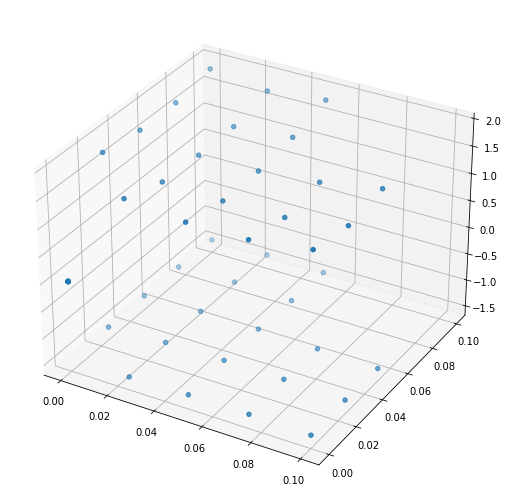

In [270]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


def plot_distribuicao_superficial(X, Y, Z):
    ax = plt.figure(figsize=(16,9)).add_subplot(projection='3d')
    ax.scatter(X, Y, Z, cmap=cm.coolwarm)

    plt.show()

plot_distribuicao_superficial(placas['x'], placas['y'], amplitudes)

Perceba que os pontos próximos à borda explodem para infinito, como esperado  
A visualização não está muito precisa pois a quantidade de pontos não é grande o bastante,  
mas nos gráficos subsequentes é possível ver mais facilmente

### 3

In [271]:
def generate_distr(N):
    m = 2*(N**2)

    L = 10e-2
    DELTA = L/N

    d = 10e-3
    V_0 = 10
    e_0 = 8.8541e-12

    
    (valid, x_axis_valid, y_axis_valid) = generate_points(N, L)

    plot_placa(x_axis_valid, y_axis_valid)
    
    x_flattened = list(chain(*x_axis_valid))
    y_flattened = list(chain(*y_axis_valid))
    valid_flattened = list(chain(*valid))
    
    placas = generate_placas(N, x_flattened, y_flattened, valid_flattened, 0, d)
    # print(placas)
    
    (V_placa, V_placa_d) = generate_V_placas(N, 0, V_0)
    local_V = pd.concat([V_placa, V_placa_d]).reset_index().drop('index', axis=1)
    
    local_Z = generate_Z(placas, m, DELTA)
    
    a = solve_system(local_Z, local_V)
    
    amplitudes = pd.Series(list(chain(*a)))

    plot_distribuicao_superficial(X=placas['x'], Y=placas['y'], Z=amplitudes)
    return "OK"

Calculando com $ N = 8 $

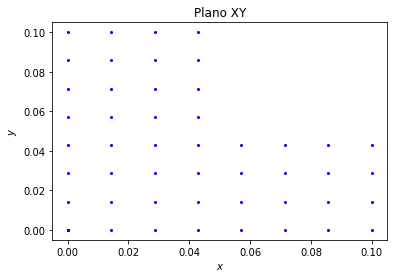

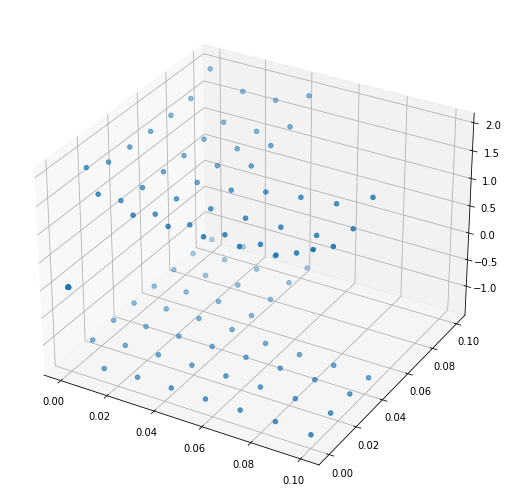

'OK'

In [272]:
generate_distr(8)

Calculando com $N=10$

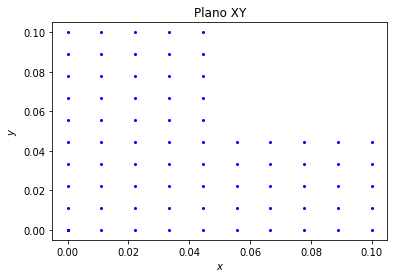

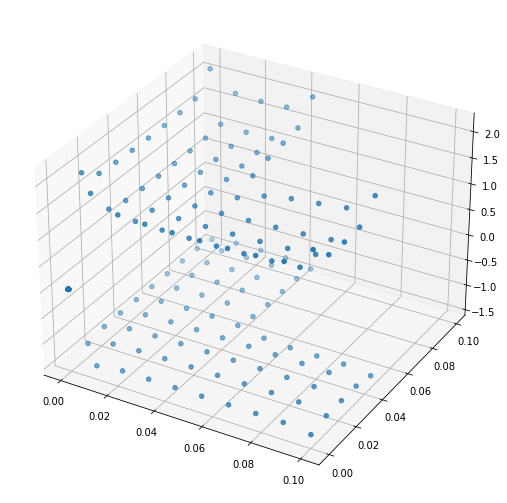

'OK'

In [273]:
generate_distr(10)

Calculando com $N=15$

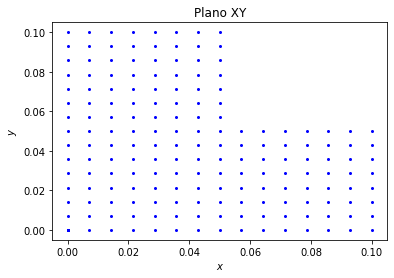

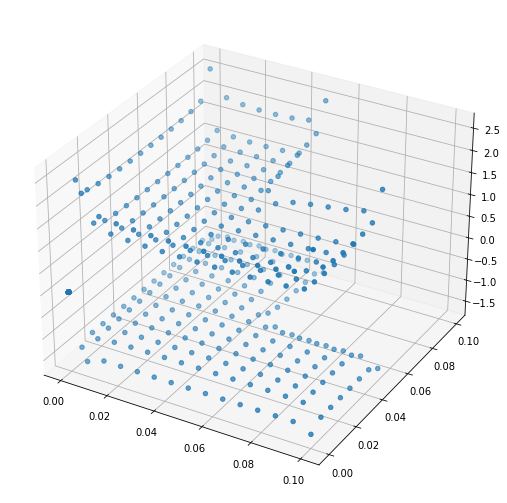

'OK'

In [274]:
generate_distr(15)

Calculando com $N=20$

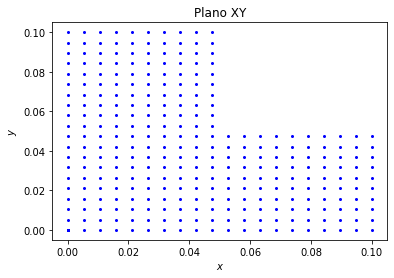

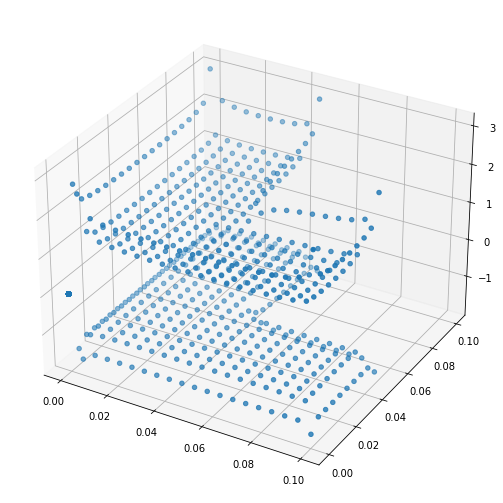

'OK'

In [275]:
generate_distr(20)

Calculando com $N=30$

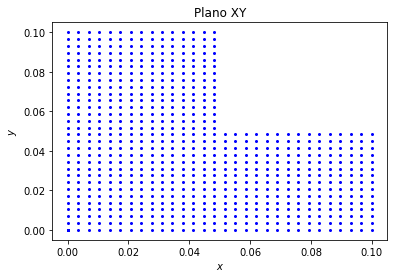

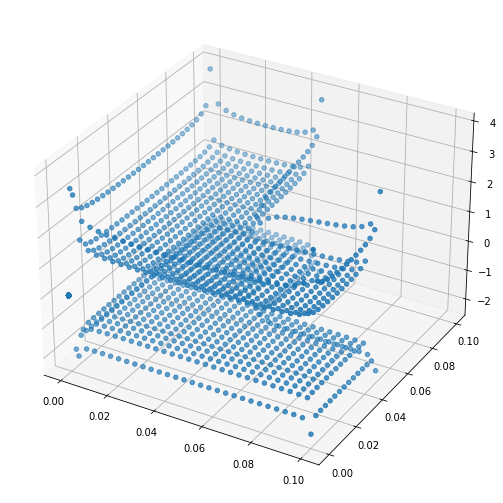

'OK'

In [276]:
generate_distr(30)

### 4 

Apenas refatorando o código para que ele realize os métodos desejados até o valor das amplitudes

In [215]:
def generate_amplitudes(N):
    m = 2*(N**2)

    L = 10e-2
    DELTA = L/N

    d = 10e-3
    V_0 = 10
    e_0 = 8.8541e-12

    
    (valid, x_axis_valid, y_axis_valid) = generate_points(N, L)

    # plot_placa(x_axis_valid, y_axis_valid)
    
    x_flattened = list(chain(*x_axis_valid))
    y_flattened = list(chain(*y_axis_valid))
    valid_flattened = list(chain(*valid))
    
    placas = generate_placas(N, x_flattened, y_flattened, valid_flattened, 0, d)
    # print(placas)
    
    (V_placa, V_placa_d) = generate_V_placas(N, 0, V_0)
    local_V = pd.concat([V_placa, V_placa_d]).reset_index().drop('index', axis=1)
    
    local_Z = generate_Z(placas, m, DELTA)
    
    a = solve_system(local_Z, local_V)
    return a

In [238]:
N_vals = list(range(1, 30, 2))

In [239]:
y = [(generate_amplitudes(x).sum() * (DELTA ** 2) / V_0) for x in N_vals]

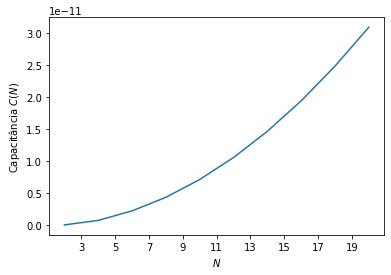

In [280]:
plt.xlabel("$N$")
plt.ylabel("Capacitância $C(N)$")
plt.xticks(N_vals)
plt.plot(np.array(N_vals)+1, y)

O ponto tende à convergência à medida em que o valor N cresce, em $ N > 50 $, já que  
aumentar o $ N $ aumenta a quantidade dos pontos, e assim tende ao valor real

Nesse projeto não é possível ver em um tempo razoável pois o tempo de cálculo é muito demorado;  
é possível melhorar o tempo de algoritmo utilizando [Programação dinâmica](https://www.google.com.br), otimizando  
os dados com uma biblioteca que permite paralelismo como [Polars](https://www.pola.rs/)  
ou uma linguagem mais otimizada para calculo, como C ou Rust

Caso tenha interesse, basta setar os pontos de N de interesse para variável ```N_vals```

<br> $ N = 10\Rightarrow \approx 1\text{ min }10\text{ s } \\ N = 20 \Rightarrow \approx 7min \\ \dots$<br>